In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from collections import Counter
import math
%matplotlib notebook

BENFORD'S LAW:


Benford's law or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. 

In [116]:
loc = r"insurance.csv" #location of our source dataset
df = pd.read_csv(loc) #loading data

In [3]:
df.head(10)

,PolicyID,Line,Construction,TIV_2012
0,119736,Residential,Masonry,792148.90
1,448094,Residential,Masonry,1438163.57
2,206893,Residential,Wood,192476.78
3,333743,Residential,Wood,86854.48
4,172534,Residential,Wood,246144.49
5,785275,Residential,Masonry,884419.17
6,995932,Commercial,Reinforced Concrete,20610000.00
7,223488,Residential,Wood,348374.25
8,433512,Residential,Wood,265821.57
9,142071,Residential,Masonry,1010842.56


In [13]:
df.shape

(36634, 4)

In [11]:
amount = list(df['TIV_2012']) #all the values of TIV_2012 because we need to study benford law on this data

In [75]:
first_digit = list() #first digit of all the values in TIV_2012(amount)
for amt in amount:
    first_digit.append(str(amt)[0])

In [17]:
len(first_digit) 

36634

In [26]:
digit = list() #list containing all the values from 1 to 9
benford = list() #list containing all the values obeying Benford's distribution from 1 to 9
for d in range(1,10):
    digit.append(d)
    benford.append((log(d+1, 10) - log(d,10)))

In [96]:
count = list() #list containing the count of digits from 1-9 in original dataset
for value in sorted(Counter(first_digit)): 
    count.append(Counter(first_digit)[value])


In [74]:
size = len(df) #totals rows in our dataset
Z_value = 1.96 #Z Value for 95% confidence

In [97]:
upper_limit = list() #list having acceptable upper limit for our distribution
lower_limit = list() #list having acceptable lower limit for our distribution
#if distribution of a digit lies with the range of upper and lower limit then no fraud case.
frequency = list() #list having the actual distribution of all the digits from original dataset

for x in range(len(digit)):
    calc = benford[x] + (Z_value)*(math.sqrt(benford[x]*(1-benford[x])/size)) + 1/(2*size)
    upper_limit.append(calc)
    calc = benford[x] - (Z_value)*(math.sqrt(benford[x]*(1-benford[x])/size)) - 1/(2*size)
    lower_limit.append(calc)
    frequency.append(count[x]/size)
    

In [115]:
#making a datafram from al the lists we calculated fro digits from 1-9 above
final_data = pd.DataFrame(list(zip(digit, benford,upper_limit, lower_limit, count, frequency)),  
                    columns =['Digit', 'Benford Dist', 'Upper Limit', 'Lower Limit', 'Count', 'Frequency'])
final_data

,Digit,Benford Dist,Upper Limit,Lower Limit,Count,Frequency
0,1,0.301030,0.305741,0.296319,11345,0.309685
1,2,0.176091,0.180005,0.172177,6317,0.172435
2,3,0.124939,0.128338,0.121539,4276,0.116722
3,4,0.096910,0.099953,0.093867,3379,0.092237
4,5,0.079181,0.081960,0.076402,2933,0.080062
5,6,0.066947,0.069520,0.064374,2497,0.068161
6,7,0.057992,0.060399,0.055585,2208,0.060272
7,8,0.051153,0.053422,0.048883,1930,0.052683
8,9,0.045757,0.047911,0.043604,1749,0.047743


<IPython.core.display.Javascript object>


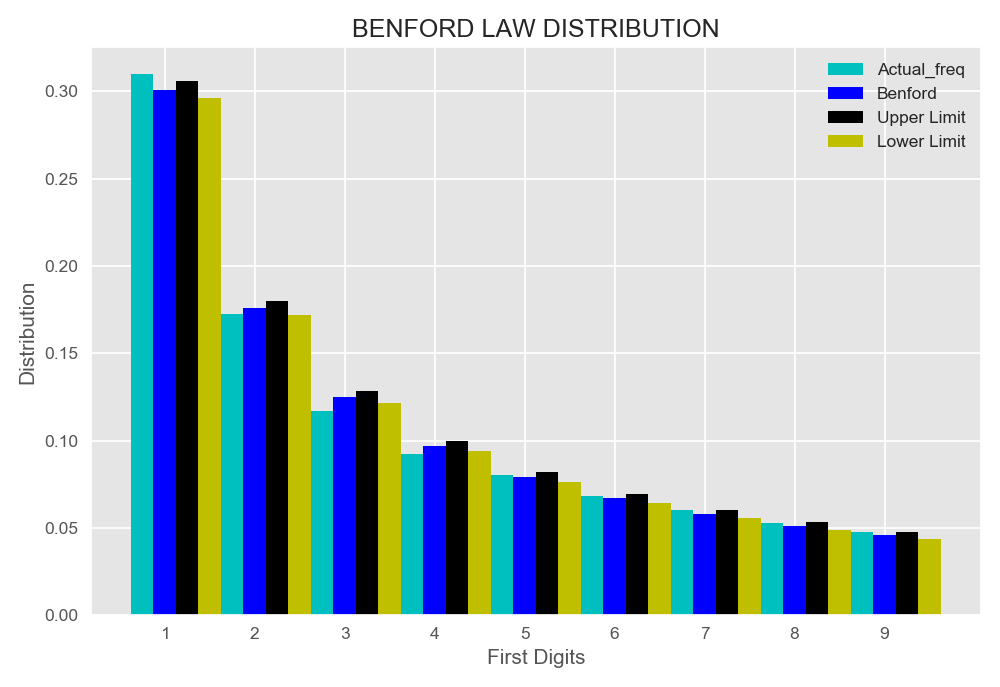

In [123]:
#plotting:
#clustered columns having upper limit and lower limit as well

indexes = np.arange(len(digit)) 
w = 0.25 #for adjusting column of every entity
plt.style.use('ggplot')
plt.title('BENFORD LAW DISTRIBUTION')
plt.xlabel('First Digits')
plt.ylabel('Distribution')
plt.xticks(ticks = indexes , labels = digit) #to show proper x values on the ages line
plt.bar(indexes - w, frequency , width = w, color='c', linewidth = 1, label = 'Actual_freq' )
plt.bar(indexes, benford ,width = w, color = 'b', linewidth=1, label = 'Benford')
plt.bar(indexes + w, upper_limit ,width = w ,color = 'k' ,linewidth = 1, label = 'Upper Limit')
plt.bar(indexes + 2*w, lower_limit ,width = w,color = 'y',linewidth = 1, label = 'Lower Limit')
plt.legend()
plt.grid(True)
plt.savefig('BL_clustered_column.png')
plt.tight_layout() #adjusts the padding for better understanding of the graph
plt.show()


<IPython.core.display.Javascript object>


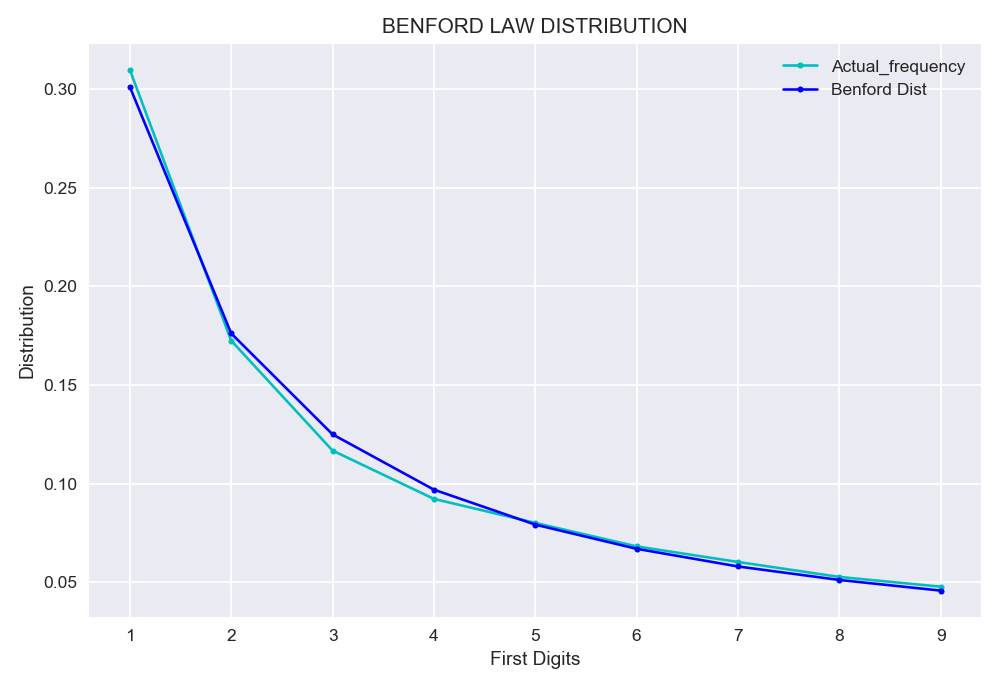

In [130]:
#plotting:
#line chart having upper limit and lower limit as well
plt.style.use('seaborn')
plt.title('BENFORD LAW DISTRIBUTION')
plt.xlabel('First Digits')
plt.ylabel('Distribution')
plt.plot(digit, frequency , color = 'c', marker = '.', linewidth = 1.5, label = 'Actual_frequency')
plt.plot(digit, benford ,color='b', marker = '.',linewidth = 1.5, label = 'Benford Dist')
plt.legend()
plt.grid(True)
plt.savefig('BL_Line_Chart.png')
plt.tight_layout() #adjusts the padding for better understanding of the graph
plt.show()